In [88]:
import numpy as np
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
def load_data():
    df = pd.read_csv('data.csv')
    df = df.drop_duplicates()

    inputs = df.iloc[:, :4]
    targets = df['action']

    scaler = MinMaxScaler((-1, 1))
    scaled_inputs = scaler.fit_transform(inputs)

    return scaled_inputs, targets

In [84]:
def save_model(model, activation_func):

    parameters = np.append(model.coef_[0, :], model.intercept_[0])

    with open('model.txt', 'w') as f:
        f.write(','.join(str(parameter) for parameter in parameters))
        f.write(',' + activation_func)

In [85]:
X, y = load_data()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Perceptron

Best model found has the following parameters: {'eta0': 1, 'fit_intercept': True, 'penalty': 'elasticnet'}
Accuracy: 0.8571428571428571


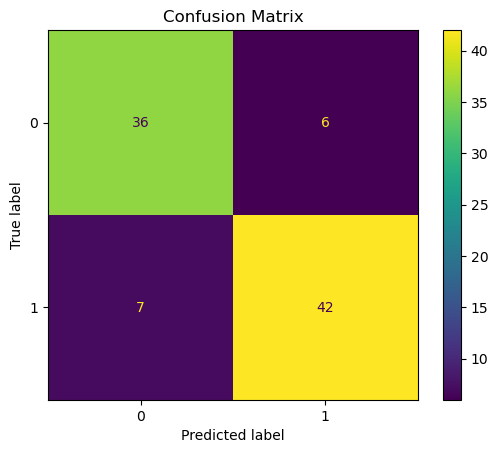

In [100]:
perceptron = Perceptron(random_state=0)
params = {'eta0': [0.5, 0.7, 1], 'penalty': ['l2', 'l1', 'elasticnet', None], 'fit_intercept': [True, False]}

models = GridSearchCV(perceptron, params)
models.fit(X_train, y_train)

perceptron_best = models.best_estimator_

print('Best model found has the following parameters:', models.best_params_)

print('Accuracy:', perceptron_best.score(X_test, y_test))

conf_mat = confusion_matrix(perceptron_best.predict(X_test), y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=perceptron_best.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [96]:
save_model(perceptron_best, 'step')

# Logistic Regression

Best model found has the following parameters: {'fit_intercept': True, 'penalty': 'l2'}
Accuracy: 0.8791208791208791


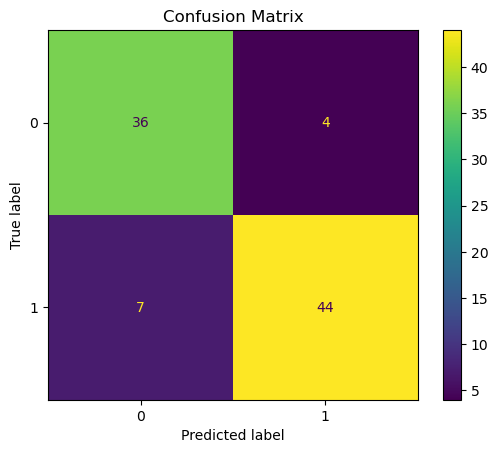

In [102]:
log_reg = LogisticRegression(random_state=0)
params = {'penalty': ['l2', None], 'fit_intercept': [True, False]}

models = GridSearchCV(log_reg, params)
models.fit(X_train, y_train)

log_reg_best = models.best_estimator_

print('Best model found has the following parameters:', models.best_params_)

print('Accuracy:', log_reg_best.score(X_test, y_test))

conf_mat = confusion_matrix(log_reg_best.predict(X_test), y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=log_reg_best.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [105]:
save_model(log_reg_best, 'sigmoid')